In [5]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

# dataset -titanic

In [120]:
df=sns.load_dataset('titanic')

In [25]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,null_deck
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1


In [5]:
# checking what are null values which are actually present

# types of missing value 

In [8]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

#### Missing Completely at Random, MCAR: 
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations. When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing, within the dataset. In other words, those missing data points are a random subset of the data. There is nothing systematic going on that makes some data more likely to be missing than other.

In [9]:
#  age and deck have missing value 
# does they have some relation  ? 
# yes, as this is recorded after the accident , some may died so the information regarding their age and deck where they are staying are missing
#  there is some relation ship age and deck because of that 
# so this age and deck are not missing at random

In [35]:
# embark_town  have 2 missing value
#here we can say that it is missing at random

In [ ]:
# meaning of embark_town is from which station they have been picked up

In [34]:
df[df["embark_town"].isna()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,null_deck
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,0


##### Missing Data Not At Random(MNAR): 
Systematic missing Values There is absolutely some relationship between the data missing and any other values, observed or missing, within the dataset.

In [13]:
# in this data set  age and deck here we can say that it is not missing at random

In [20]:

df["null_deck"]=np.where(df['deck'].isna(),1,0)

In [ ]:
# for deck column we are converting it into 1 and 0 's
# if deck --> nan---> 1
# else ---> 0

In [21]:
df["null_deck"].mean()
# mean of the missing values

0.7721661054994389

In [ ]:
# or

In [29]:
len(df[df["deck"].isna()])/len(df)

0.7721661054994389

In [30]:
# now we will be compare null_dec with survived column 
# to check it 

In [32]:
df.groupby(["survived"])["null_deck"].mean()

survived
0    0.877960
1    0.602339
Name: null_deck, dtype: float64

In [33]:
# so it is clear person who have survived  have less missing value in deck  ->60%
# where as persons who died , they have more missing values                 ->87%
# so it is not missing at random

#### Missing At Random(MAR)

the probability of the missing value w.r.t various fetures this will almost same in the whole dataset

Men---hide their salary

Women---hide their age

# handling missing values (numeric)

1. Mean/ Median/Mode replacement
2. Random Sample Imputation  
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

# mean / median / mode imputation

When should we apply? 

Mean/median imputation has the assumption that the data are missing completely at random(MCAR). We solve this by replacing the NAN with the most frequent occurance of the variables

In [54]:
d=df[["survived","age","fare"]]

In [55]:
d.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [56]:
# percentage of data which is missing

In [57]:
d.isna().mean()

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [58]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [59]:
median=df.age.median()
median

28.0

In [62]:
impute_nan(d,'age',median)
d.head()

,survived,age,fare,age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [ ]:
1# checking the SD and mean  after impuation

In [63]:
d["age"].std()

14.526497332334044

In [65]:
d["age_median"].std()

13.019696550973194

In [66]:
# SD has not much changed  ---> can accept it 

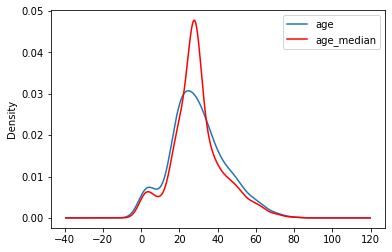

In [69]:
fig = plt.figure()
ax = fig.add_subplot(111)
d['age'].plot(kind='kde', ax=ax)
d.age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [72]:
# blue line is real age values
# after median impution red line --> the nan values are filled with median

# Advantages And Disadvantages of Mean/Median Imputation
####  Advantages
Easy to implement(Robust to outliers)

Faster way to obtain the complete dataset 
#### Disadvantages
1 Change or Distortion in the original variance 

2 Impacts Correlatio

# Random Sample Imputation  

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 

It assumes that the data are missing completely at random(MCAR)

In [73]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [79]:
d=d.drop("age_median",axis=1)

In [80]:
d.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [82]:
d.isna().sum()

survived      0
age         177
fare          0
dtype: int64

In [83]:
d.isna().mean() 

survived    0.000000
age         0.198653
fare        0.000000
dtype: float64

In [84]:
d['age'].dropna().sample() # give random sample out of the values which are present in the age column(excluding nan values) each time we run this code

581    39.0
Name: age, dtype: float64

In [85]:
d['age'].dropna().sample(d["age"].isna().sum())
# it replacing nan  with the sample value ...  each time we run this code it will change 
# to fix it

450    36.0
575    19.0
362    45.0
763    36.0
294    24.0
       ... 
396    31.0
61     38.0
138    16.0
843    34.5
865    42.0
Name: age, Length: 177, dtype: float64

In [87]:
d['age'].dropna().sample(d["age"].isna().sum(),random_state=42)
# now it not going to change

149    42.0
407     3.0
53     29.0
369    24.0
818    43.0
       ... 
38     18.0
247    24.0
445     4.0
323    22.0
714    52.0
Name: age, Length: 177, dtype: float64

In [90]:
d[d["age"].isna()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [100]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)  # this will create new feature w.r.t median imputation and replace all the nan values with the median
    df[variable+"_random"]=df[variable] # copying what ever value in the age column in another variable
     # it will have random sample to fil the na
    random_sample=df['age'].dropna().sample(df["age"].isna().sum(),random_state=42)
    # pandas need to have same index to merge the dataset
    random_sample.index=df[df[variable].isna()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample
    

In [101]:
median=d["age"].median()

In [102]:
impute_nan(d,"age",median)

In [103]:
d.head()

,survived,age,fare,age_median,age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


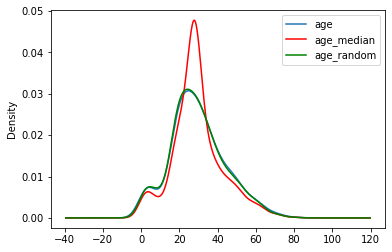

In [105]:
fig = plt.figure()
ax = fig.add_subplot(111)
d['age'].plot(kind='kde', ax=ax)
d.age_median.plot(kind='kde', ax=ax, color='red')
d.age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [106]:
# the distributionin varince  of age_random is similar to the age to change at all


#### Advantages

Easy To implement

There is less distortion in variance

#### Disadvantage

Every situation randomness wont work

Capturing NAN values with a new feature

It works well if the data are not missing completely at random

# Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [107]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [108]:
d=df[["survived","age","fare"]]

In [109]:
d.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [113]:
d["age_nan"]=np.where(df["age"].isnull(),1,0)

In [114]:
d

,survived,age,fare,age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,NaN,23.4500,1
889,1,26.0,30.0000,0


In [117]:
d.age.mean()

29.69911764705882

In [ ]:
#now we can replace the missing value with median or any other technique
# as we have this new feature age_nan which whill keep the record that which value is replace from nan to median and which is not

In [119]:
d["age"].fillna(d["age"].fillna(median),inplace=True)

In [122]:
d.head(10)

,survived,age,fare,age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantages
Easy to implement

Captures the importance of missing values

#### Disadvantages

Creating Additional Features(Curse of Dimensionality)

# End of Distribution imputation

In [123]:
d=df[["survived","age","fare"]]

In [124]:
d.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


<AxesSubplot:>

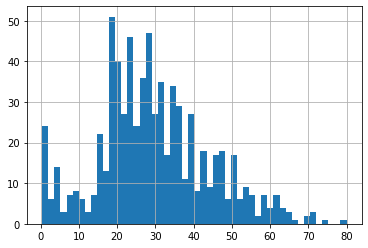

In [125]:
df.age.hist(bins=50)

In [126]:
df.age.mean() # gives you the central value

29.69911764705882

In [127]:
# if we want far end distribution 
# we will be taking after the 3 SD

normal distribution
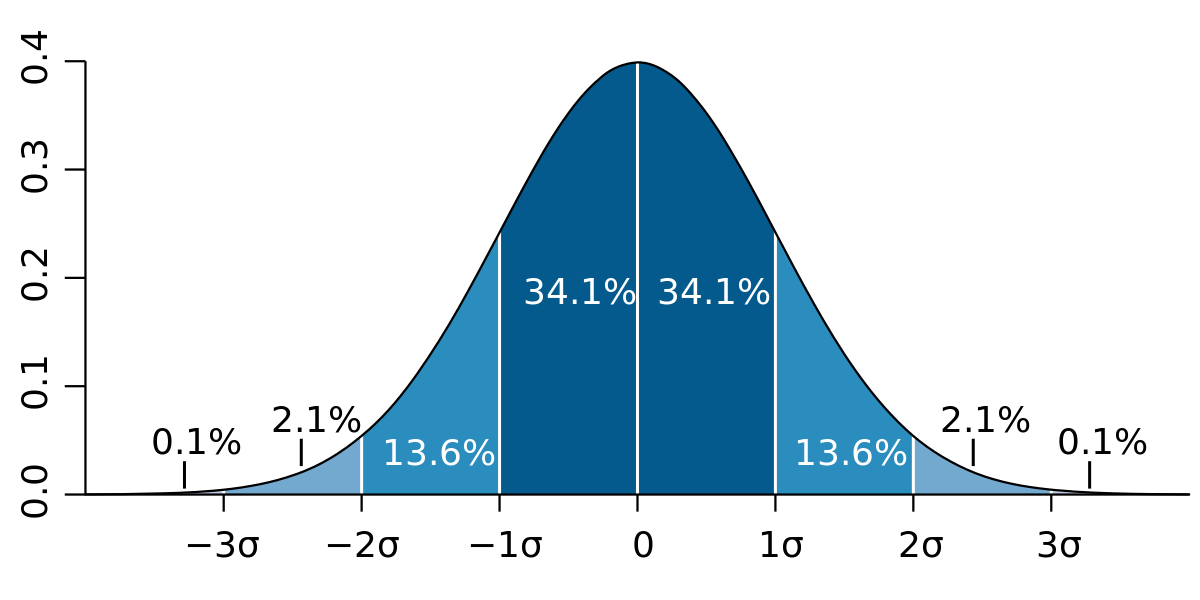

In [134]:
d.age.mean() +3*d.age.std()

73.27860964406095

<AxesSubplot:xlabel='age'>

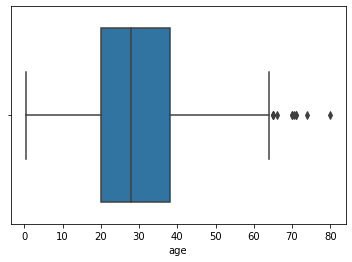

In [131]:
# to check the outliers
sns.boxplot("age",data=d)

In [133]:
extreme=d.age.mean() +3*d.age.std()

In [140]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_Distribution"]=df[variable].fillna(extreme) # creating new feature where we are filling the nan values ith extreme value
    df[variable].fillna(median,inplace=True) # filling the nan with median

In [141]:
# why we took right side---> because in our data we have right side outliers

In [142]:
impute_nan(d,"age",d.age.median(),extreme)

In [144]:
d.head()

,survived,age,fare,age_end_Distribution
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


<AxesSubplot:>

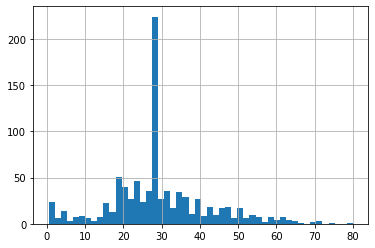

In [146]:
d["age"].hist(bins=50)

In [ ]:
# all the nan values  are in centre and replaced by te median
# there is this huge value

<AxesSubplot:>

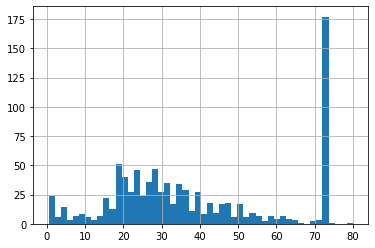

In [147]:
d["age_end_Distribution"].hist(bins=50)

In [148]:
# last longer line we are getting 
# it is rightly skewed
# which is is better
# for this we check the box plot

<AxesSubplot:xlabel='age_end_Distribution'>

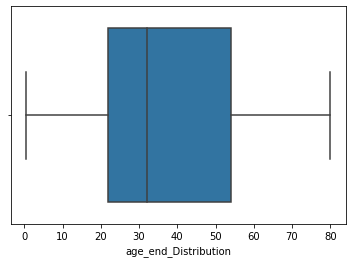

In [149]:
sns.boxplot("age_end_Distribution",data=d)

In [150]:
# here we are not seeing any outliers 
# now it is giving the proper distribution of age 
# some times this also works

#### Advantages:
· Easy to implement

· Fast way of obtaining complete datasets

· Can be integrated into production (during model deployment)

· Captures the importance of “missingness” if there is one

#### Disadvantages:
· Distortion of the original variable distribution

· Distortion of the original variance

· Distortion of the covariance with the remaining variables of the dataset

· This technique may mask true outliers in the distribution

# Arbitrary imputation

this technique was derived from kaggle competition It consists of replacing NAN by an arbitrary value

In [153]:
d=df[["survived","age","fare"]]

In [154]:
d.head()

,survived,age,fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [157]:
def impute_nan(df,variable):
    df[variable+"_Zero"]=df[variable].fillna(0)
    df[variable+"_hundred"]=df[variable].fillna(100)

<AxesSubplot:>

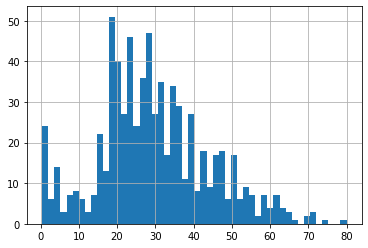

In [156]:
d["age"].hist(bins=50)

In [158]:
impute_nan(d,"age")

In [159]:
d.head()

,survived,age,fare,age_Zero,age_hundred
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


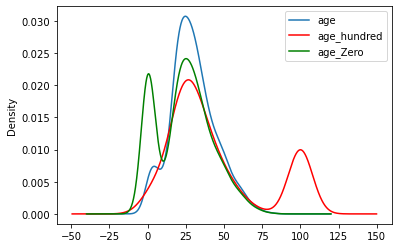

In [160]:
fig = plt.figure()
ax = fig.add_subplot(111)
d['age'].plot(kind='kde', ax=ax)
d.age_hundred.plot(kind='kde', ax=ax, color='red')
d.age_Zero.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#### Advantages:
· Easy to implement

· Fast way of obtaining complete datasets

· Can be integrated into production (during model deployment)

· Captures the importance of “missingness” if there is one

#### Limitations:
· Distortion of the original variable distribution
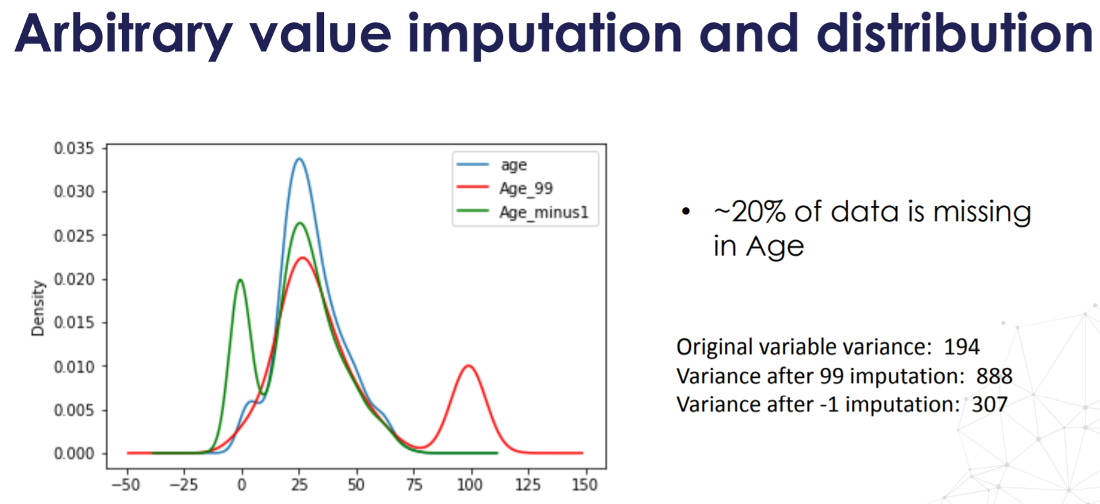

Distortion of Original Variable Distribution




· Distortion of the original variance

· Distortion of the covariance with the remaining variables of the dataset

 # handle Missing values in categorical data

In [ ]:
# tasking new dataset

In [7]:
data=pd.read_csv(r"D:\full_stack\MyPractice\eda-fe\learnin from yt\data\house-prices-advanced-regression-techniques\train.csv")

In [8]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Frequent categories imputation

#### it is  MCAR

In [36]:
pd.set_option('display.max_columns', None) # to see all the columns

In [37]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [39]:
d=data[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [40]:
d.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [41]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [42]:
d.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [43]:
d.shape

(1460, 4)

In [44]:
d.isnull().mean()

BsmtQual       0.025342
FireplaceQu    0.472603
GarageType     0.055479
SalePrice      0.000000
dtype: float64

In [45]:
d.isnull().mean().sort_values(ascending=False)

FireplaceQu    0.472603
GarageType     0.055479
BsmtQual       0.025342
SalePrice      0.000000
dtype: float64

In [46]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   BsmtQual     1423 non-null   object
 1   FireplaceQu  770 non-null    object
 2   GarageType   1379 non-null   object
 3   SalePrice    1460 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 45.8+ KB


In [47]:
# BsmtQual  and GarageType have less number of missing values so we can replace it with most frequent category

#### compute the frequency  with every feature

In [48]:
d.groupby(["BsmtQual"])["BsmtQual"].count()

BsmtQual
Ex    121
Fa     35
Gd    618
TA    649
Name: BsmtQual, dtype: int64

In [49]:
#or

In [50]:
d["BsmtQual"].value_counts().sort_values(ascending=False)

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

<AxesSubplot:>

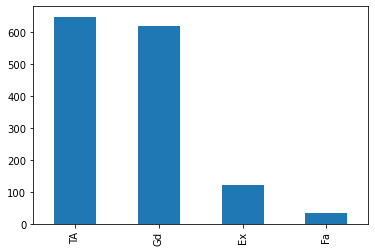

In [51]:
d["BsmtQual"].value_counts().sort_values(ascending=False).plot.bar()
# in Bsmtqual TA is maximum fequent category

<AxesSubplot:>

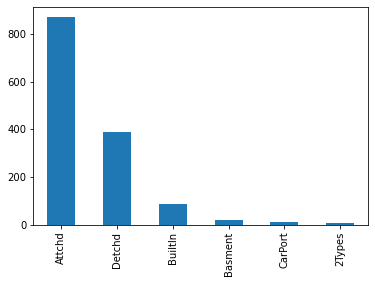

In [52]:
d["GarageType"].value_counts().sort_values(ascending=False).plot.bar()
# in GarageType attchd is maximum fequent category

<AxesSubplot:>

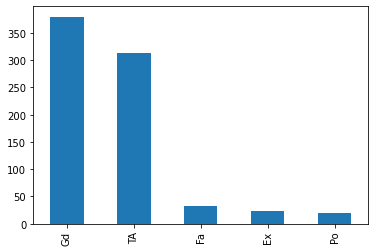

In [53]:
d["FireplaceQu"].value_counts().sort_values(ascending=False).plot.bar()
# in FireplaceQu  Gd is maximum fequent category

In [54]:
d["GarageType"].value_counts().index[0]
# to get the  most fequent category

'Attchd'

In [55]:
# replacing function
def impute_nan(df,varibale):
    most_frequent_category=df[varibale].value_counts().index[0]
    df[varibale].fillna(most_frequent_category,inplace=True)


In [56]:
for feature in ["BsmtQual","FireplaceQu","GarageType"]:
    impute_nan(d,feature)

In [58]:
d.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,Gd,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [59]:
# or you can use mode 

In [60]:
d["GarageType"].mode()[0]

'Attchd'

In [63]:
def impute_nan(df,varibale):
    most_frequent_category=df[varibale].mode()[0]
    df[varibale+"_imputed"]=df[varibale].fillna(most_frequent_category)


In [64]:
for feature in ["BsmtQual","FireplaceQu","GarageType"]:
    impute_nan(d,feature)

In [65]:
d.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_imputed,FireplaceQu_imputed,GarageType_imputed
0,Gd,Gd,Attchd,208500,Gd,Gd,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [69]:
temp = pd.concat(
        [
            d['GarageType'].value_counts() / len(d['GarageType'].dropna()),
            d['GarageType_imputed'].value_counts() / len(d)
        ],
        axis=1)

temp.columns = ['original', 'imputed']

In [70]:
temp

,original,imputed
Attchd,0.651370,0.651370
Detchd,0.265068,0.265068
BuiltIn,0.060274,0.060274
Basment,0.013014,0.013014
CarPort,0.006164,0.006164
2Types,0.004110,0.004110


In [72]:
temp = pd.concat(
        [
            d['FireplaceQu'].value_counts() / len(d['FireplaceQu'].dropna()),
            d['FireplaceQu_imputed'].value_counts() / len(d)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
Gd,0.732877,0.732877
TA,0.214384,0.214384
Fa,0.022603,0.022603
Ex,0.016438,0.016438
Po,0.013699,0.013699


In [73]:
temp = pd.concat(
        [
            d['BsmtQual'].value_counts() / len(d['BsmtQual'].dropna()),
            d['BsmtQual_imputed'].value_counts() / len(d)
        ],
        axis=1)

temp.columns = ['original', 'imputed']
temp

,original,imputed
TA,0.469863,0.469863
Gd,0.423288,0.423288
Ex,0.082877,0.082877
Fa,0.023973,0.023973


#### distribution before imputation

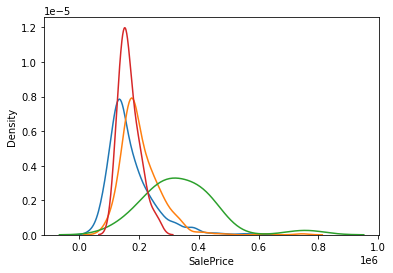

In [74]:
for category in d['BsmtQual'].dropna().unique():
    sns.distplot(d[d['FireplaceQu'] == category]['SalePrice'],hist=False,label=category)
plt.show()

#### distribution after imputation

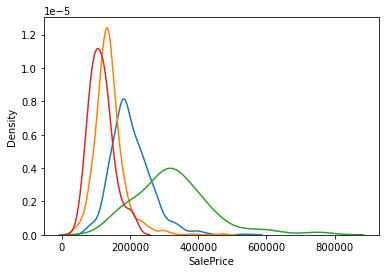

In [76]:
for category in d['BsmtQual_imputed'].dropna().unique():
    sns.distplot(d[d['BsmtQual_imputed'] == category]['SalePrice'],hist=False,label=category)
plt.show()

In [ ]:
# change in distribution (red flag)

In [263]:
# as we know this FireplaceQu have 47 percent of missing value this will give isssue
# replacing with frequent category in this case will distort the relation ship of the most freq cateory with sales price

#### Advantages
1.Easy To implement

2.Fater way to implement 
#### Disadvantages
1.Since we are using the more frequent labels, it may use them in an over respresented way, if there are many nan's

2.It distorts the relation of the most frequent label

# adding a variale to compare nan

In [271]:
d=data[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [272]:
d.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [275]:
d["BsmtQual_var"]=np.where(d["BsmtQual"].isnull(),1,0)
# here we are creating a new varibale which is capturing the importance of missing value

In [278]:
d.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [279]:
# now we can replace the bsmtqual with most frequent category

In [282]:
fequent=d["BsmtQual"].mode()[0]

In [285]:
d["BsmtQual"].fillna(fequent,inplace=True)

In [288]:
# this technique will also work well  where we have more nan values like here with FireplaceQu 

In [289]:
d["FireplaceQu_var"]=np.where(d["FireplaceQu"].isnull(),1,0)
fequent=d["FireplaceQu"].mode()[0]
d["FireplaceQu"].fillna(fequent,inplace=True)

In [290]:
d.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,1
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


## Suppose if you have more frequent categories, we just replace NAN with a new category  ( Missing indicator)

In [77]:
# important technique

In [291]:
d=data[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [292]:
d.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [294]:
def impute_nan(df,varibale):
    df[varibale+"_newvar"]=np.where(df[varibale].isna(),"Missing",df[varibale])
   


In [295]:
for feature in ["BsmtQual","FireplaceQu","GarageType"]:
    impute_nan(d,feature)

In [296]:
d.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,Gd,NaN,Attchd,208500,Gd,Missing,Attchd
1,Gd,TA,Attchd,181500,Gd,TA,Attchd
2,Gd,TA,Attchd,223500,Gd,TA,Attchd
3,TA,Gd,Detchd,140000,TA,Gd,Detchd
4,Gd,TA,Attchd,250000,Gd,TA,Attchd


In [ ]:
#or

In [80]:
from sklearn.impute import SimpleImputer

In [78]:
d=data[['BsmtQual','FireplaceQu','GarageType','SalePrice']]

In [79]:
d.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [297]:
# after doing this we drop the old features as they are not required

In [300]:
d=d.drop(["BsmtQual","FireplaceQu","GarageType"],axis=1)

In [301]:
d.head()

,SalePrice,BsmtQual_newvar,FireplaceQu_newvar,GarageType_newvar
0,208500,Gd,Missing,Attchd
1,181500,Gd,TA,Attchd
2,223500,Gd,TA,Attchd
3,140000,TA,Gd,Detchd
4,250000,Gd,TA,Attchd
